<a href="https://colab.research.google.com/github/TithiSreemany/Snapchat-Filter/blob/main/Snapchat_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python==3.1.0.4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
!wget https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa


--2020-11-15 16:17:33--  https://www.dropbox.com/sh/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa [following]
--2020-11-15 16:17:33--  https://www.dropbox.com/sh/raw/p87f33rjkkevu9z/AAA963Q5FMQXHl-XIxxLsDDJa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7961816dc107fed48b6e68b432.dl.dropboxusercontent.com/zip_download_get/Ampyz9mRd-GHLqGOVYqJNZzDu3u50UMq3pYpLOMukQRGi78m1JHxnq8fbiL5qps9g-QPZI-z1YVa5xpiC4N097PypqWD5FUt-iLHvEosZLvbHg [following]
--2020-11-15 16:17:34--  https://uc7961816dc107fed48b6e68b432.dl.dropboxusercontent.com/zip_download_get/Ampyz9mRd-GHLqGOVYqJNZzDu3u50UMq3pYpLOMukQRGi78m1JHxnq8fbiL5qps9g-QPZI-z1YVa5xpiC4N097Pyp

In [ ]:
!unzip AAA963Q5FMQXHl-XIxxLsDDJa

Archive:  AAA963Q5FMQXHl-XIxxLsDDJa
mapname:  conversion of  failed
replace glasses.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mustache.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Nose18x15.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Jamie_Before.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace frontalEyes35x16.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
noseCascade= cv2.CascadeClassifier("/content/Nose18x15.xml")

In [ ]:
eyeCascade= cv2.CascadeClassifier("/content/frontalEyes35x16.xml")

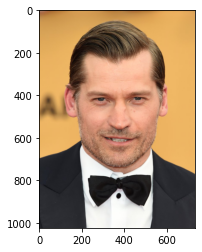

In [ ]:
img=plt.imread("/content/Jamie_Before.jpg")
plt.imshow(img)

In [ ]:
img.shape

(1024, 733, 3)

In [ ]:
eye=eyeCascade.detectMultiScale(img)[0]
print (eye)

[218 349 317 145]


In [ ]:
eye_x,eye_y,eye_w, eye_h= eye

In [ ]:
nose=noseCascade.detectMultiScale(img, 1.5 )[0]
print (nose)

[308 476 137 114]


In [ ]:
nose_x,nose_y,nose_w ,nose_h= nose

In [ ]:
img = cv2.rectangle(img, (eye_x, eye_y), (eye_x + eye_w, eye_y + eye_h), (255,255,255), 2 ) 
img = cv2.rectangle(img, (nose_x, nose_y), (nose_x + nose_w, nose_y + nose_h), (255,255,255), 2 )

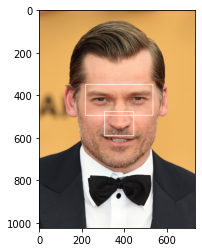

In [ ]:
plt.imshow(img)

In [ ]:
mustache= plt.imread("/content/mustache.png")
glasses=plt.imread("/content/glasses.png")

In [ ]:
mustache.shape

(320, 640, 4)

In [ ]:
glasses.shape

(221, 483, 4)

In [ ]:
glasses=cv2.resize(glasses,(eye_w,eye_h))

In [ ]:
glasses.shape

(145, 317, 4)

In [ ]:
img=img.copy()

In [ ]:
for i in range(glasses.shape[0]):
  for j in range(glasses.shape[1]):
    if (glasses[i,j,3]>0):
      img[eye_y+i,eye_x+j, :]=glasses[i,j,:-1]

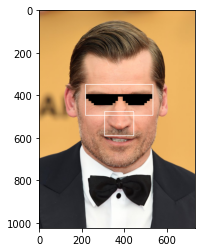

In [ ]:
plt.imshow(img)

In [ ]:
mustache =cv2.resize(mustache,(nose_w,nose_h))

In [ ]:
mustache.shape

(114, 137, 4)

In [ ]:
for i in range(mustache.shape[0]):
  for j in range(mustache.shape[1]):
    if (mustache[i,j,3]>0):
      img[nose_y+i+30, nose_x+j, :]= mustache[i,j,:-1]

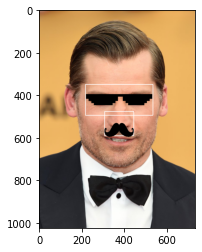

In [ ]:
plt.imshow(img)